In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [11]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [12]:
y.index = y.name


In [13]:
y = pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]


In [14]:
y.index = pd.to_datetime(y.index)

In [ ]:
# Assumption: turn the nulls to zeros

In [15]:
y.fillna(0.).sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [16]:
!pip install pytrends

In [17]:
import time

In [18]:
from pytrends.request import TrendReq

In [26]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["IPhone ", "Apple Layoffs","MacBook","iPad", "Apple CEO","Apple Share Price",
            "Recession","Chip Costs", "Taylor Swift Tickets","Is the Earth Flat","Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [27]:
X = df.resample("Q").mean()

In [28]:
#fix data
temp = pd.concat([y,X], axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso = Lasso(alpha = .1)

In [37]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [43]:
coefficients = lasso.coef_

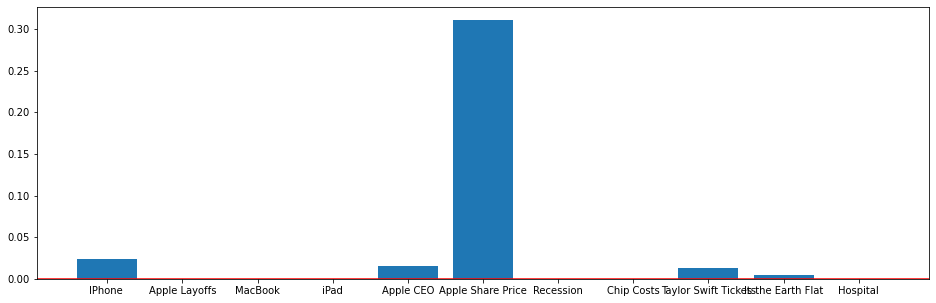

In [44]:
plt.figure(figsize = (16, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0., color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

###  Extremely high bar in Apple Share Price indicates that Apple Share Price has  a strong linear relationship with Basic EPS, and the relatively high bars in  IPhone and Apple CEO indicate that these two features have a relatively strong linear relationship with Basic EPS, according to the Lasso model. 

### "Taylor Swift Tickets" and "Is the Earth Flat" are made-up features but still have non-zero coefficients, meaning that alpha = .1 is a not-high-enough penalty to shrink the unrelated coefficients.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?